<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing The Necessary Libraries

In [161]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections import Counter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
#importing the dataset
data=pd.read_csv("/content/Market_Basket_Optimisation.csv")
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Preprocessing

In [127]:
#Checking for null values
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [128]:
#dropping the olive column as it has no values
data=data.drop(['olive oil'],axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
#Storing the data in a list for each row excluding the Nan values
transactions=[]
for i in range(0,data.shape[0]):
  transaction=[str(data.values[i,j]) for j in  range(0,data.shape[1]) if str(data.values[i,j]) !='nan' ]
  transactions.append(transaction)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [131]:
#Finding the types of items in the dataset
unique_items=set
for transaction in transactions:
    unique_items.update(item for item in transaction)


unique_list_items=list(unique_items)

unique_list_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['strawberries',
 'cottage cheese',
 'blueberries',
 'grated cheese',
 'shrimp',
 'honey',
 'toothpaste',
 'oil',
 'pickles',
 'ketchup',
 'burgers',
 'asparagus',
 'olive oil',
 'spaghetti',
 'chili',
 'mineral water',
 'bug spray',
 'candy bars',
 'almonds',
 'green tea',
 'mint',
 'cauliflower',
 'hot dogs',
 'yams',
 'clothes accessories',
 'french wine',
 'pasta',
 'parmesan cheese',
 'cake',
 'corn',
 'yogurt cake',
 'energy bar',
 'eggplant',
 'light mayo',
 'french fries',
 'soda',
 'chicken',
 'body spray',
 'milk',
 'avocado',
 'whole wheat pasta',
 'brownies',
 'herb & pepper',
 'burger sauce',
 'spinach',
 'napkins',
 'hand protein bar',
 'green grapes',
 'cream',
 'ground beef',
 'extra dark chocolate',
 'strong cheese',
 'zucchini',
 'bacon',
 'black tea',
 'cereals',
 'rice',
 ' asparagus',
 'gums',
 'bramble',
 'cookies',
 'cooking oil',
 'whole weat flour',
 'mushroom cream sauce',
 'low fat yogurt',
 'salt',
 'vegetables mix',
 'gluten free bar',
 'escalope',
 'turkey

In [132]:
#Total number of present in dataset
len(unique_list_items)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


120

In [133]:
#Converting the dataset into binary matrix(1-items present 0 - no item )
binary_matrix = pd.DataFrame(columns=unique_list_items)

new_data=[]

for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_list_items]
    new_data.append(row)


binary_matrix = pd.concat([binary_matrix,pd.DataFrame(new_data,columns=unique_list_items)],ignore_index= True)
print(binary_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     strawberries cottage cheese blueberries grated cheese shrimp honey  \
0               0              0           0             0      0     0   
1               0              0           0             0      0     0   
2               0              0           0             0      0     0   
3               0              0           0             0      0     0   
4               0              0           0             0      0     0   
...           ...            ...         ...           ...    ...   ...   
7495            0              0           0             0      0     0   
7496            0              0           0             0      0     0   
7497            0              0           0             0      0     0   
7498            0              0           0             0      0     0   
7499            0              0           0             0      0     0   

     toothpaste oil pickles ketchup  ... water spray antioxydant juice  \
0             0   0      

#EDA

In [146]:
#Finding the total number of each item
item_counts= binary_matrix.sum()
sorted_products = item_counts.sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


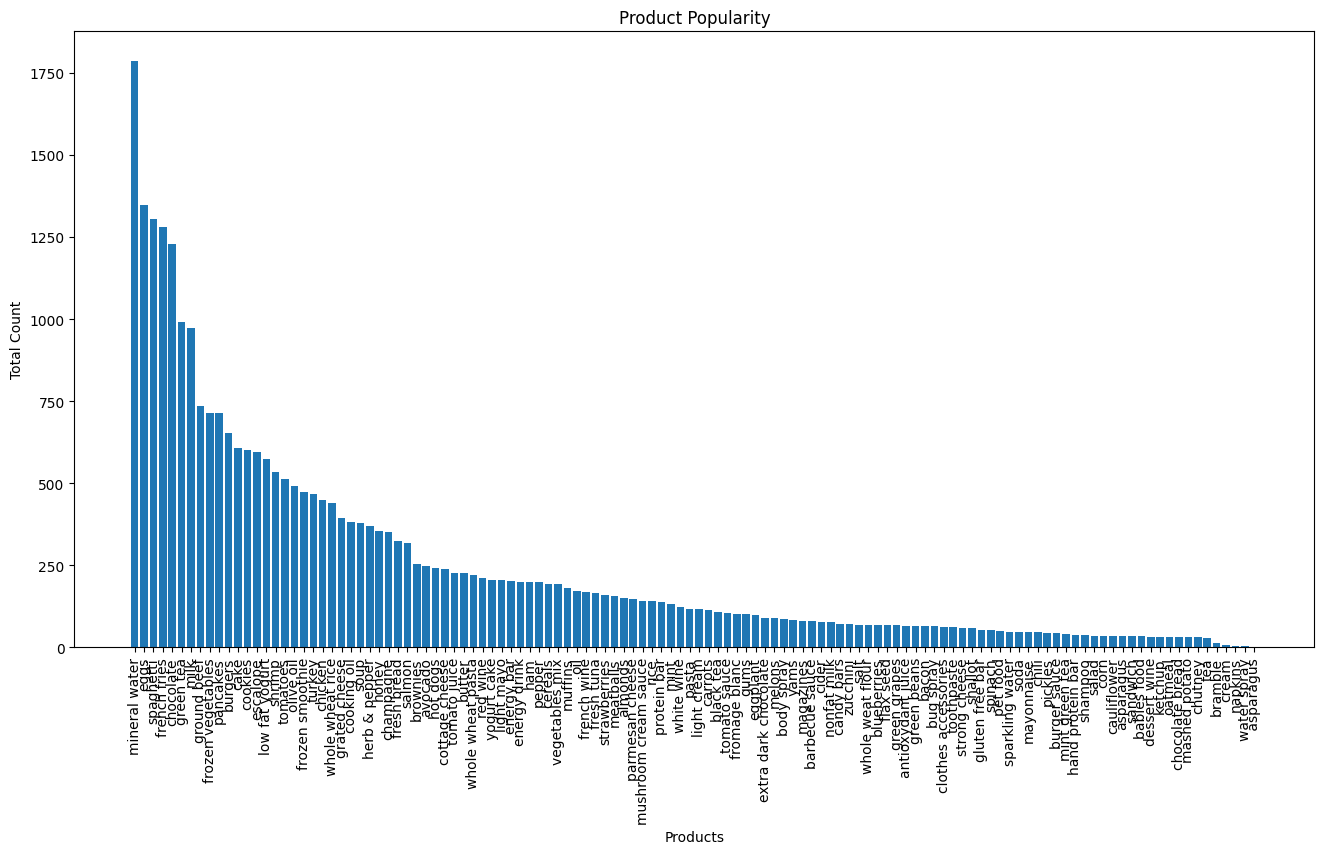

In [145]:
#Bar plot- Represent the number of times each item has been bought
plt.figure(figsize=(16,8))
plt.bar(sorted_products.index, sorted_products.values)
plt.title("Product Popularity")
plt.xlabel("Products")
plt.ylabel("Total Count")
plt.xticks(rotation=90)

plt.show()

#Inference

The above graph displays the frequency of each product's purchases.The graph helps us to identify the top selling products in the store and from the graph we can observe that Mineral water is the top selling product with over 1750+ purchases followed by eggs(2nd top selling product) with over 1250+ purchases.We can also observe that products such as napkins ,water spray and asparagus are the least bought products.

#Association Rule Mining

In [136]:
frequent_itemset = apriori(binary_matrix,min_support=0.02,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(shrimp),(spaghetti),0.071333,0.174133,0.021200,0.297196,1.706717,0.008778,1.175103,0.445886
1,(spaghetti),(shrimp),0.174133,0.071333,0.021200,0.121746,1.706717,0.008778,1.057401,0.501388
2,(shrimp),(mineral water),0.071333,0.238267,0.023467,0.328972,1.380688,0.006470,1.135174,0.296903
3,(mineral water),(shrimp),0.238267,0.071333,0.023467,0.098489,1.380688,0.006470,1.030122,0.361969
4,(spaghetti),(burgers),0.174133,0.087200,0.021467,0.123277,1.413729,0.006282,1.041150,0.354356


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


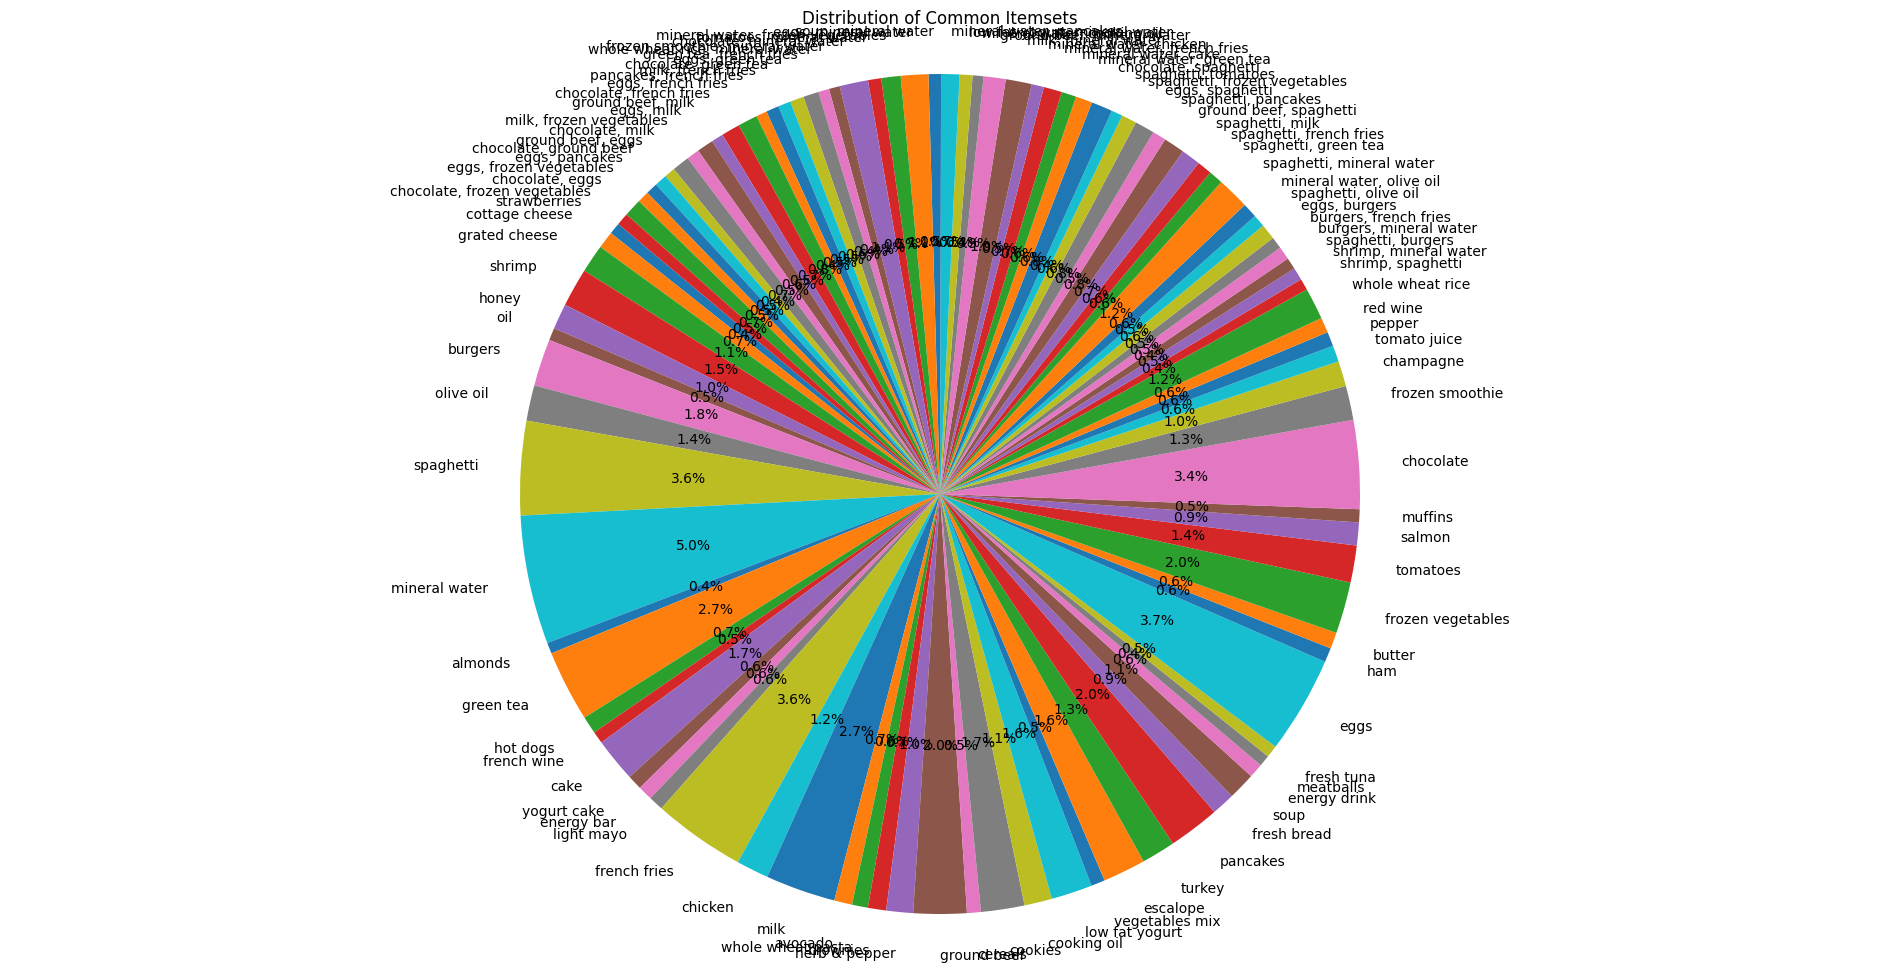

In [159]:
#Pie chart
plt.figure(figsize=(24, 12))
plt.pie(frequent_itemset['support'], labels=frequent_itemset['itemsets'].apply(lambda x: ', '.join(list(x))), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Common Itemsets')
plt.axis('equal')
plt.show()

In [137]:
rules[(rules['confidence']>0.2) & (rules['lift']>1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(shrimp),(spaghetti),0.071333,0.174133,0.021200,0.297196,1.706717,0.008778,1.175103,0.445886
2,(shrimp),(mineral water),0.071333,0.238267,0.023467,0.328972,1.380688,0.006470,1.135174,0.296903
5,(burgers),(spaghetti),0.087200,0.174133,0.021467,0.246177,1.413729,0.006282,1.095572,0.320608
6,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,0.003623,1.057693,0.162675
8,(burgers),(french fries),0.087200,0.170933,0.022000,0.252294,1.475976,0.007095,1.108813,0.353289
11,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
13,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,0.011487,1.268387,0.536127
15,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
16,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
17,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941


In [138]:
best_choices=rules.sort_values(by='lift',ascending=False)
print('Best Choices would be')
print(best_choices[['antecedents','consequents','lift']])

Best Choices would be
       antecedents      consequents      lift
23     (spaghetti)    (ground beef)  2.290857
22   (ground beef)      (spaghetti)  2.290857
13     (olive oil)      (spaghetti)  2.003547
12     (spaghetti)      (olive oil)  2.003547
48          (soup)  (mineral water)  1.915771
..             ...              ...       ...
67     (green tea)      (chocolate)  1.084893
65     (green tea)           (eggs)  1.073420
64          (eggs)      (green tea)  1.073420
68          (milk)   (french fries)  1.071339
69  (french fries)           (milk)  1.071339

[96 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
worst_choices=rules.sort_values(by='lift',ascending=True)
print('worst Choices would be')
print(worst_choices[['antecedents','consequents','lift']])

worst Choices would be
       antecedents      consequents      lift
68          (milk)   (french fries)  1.071339
69  (french fries)           (milk)  1.071339
64          (eggs)      (green tea)  1.073420
65     (green tea)           (eggs)  1.073420
67     (green tea)      (chocolate)  1.084893
..             ...              ...       ...
48          (soup)  (mineral water)  1.915771
13     (olive oil)      (spaghetti)  2.003547
12     (spaghetti)      (olive oil)  2.003547
23     (spaghetti)    (ground beef)  2.290857
22   (ground beef)      (spaghetti)  2.290857

[96 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


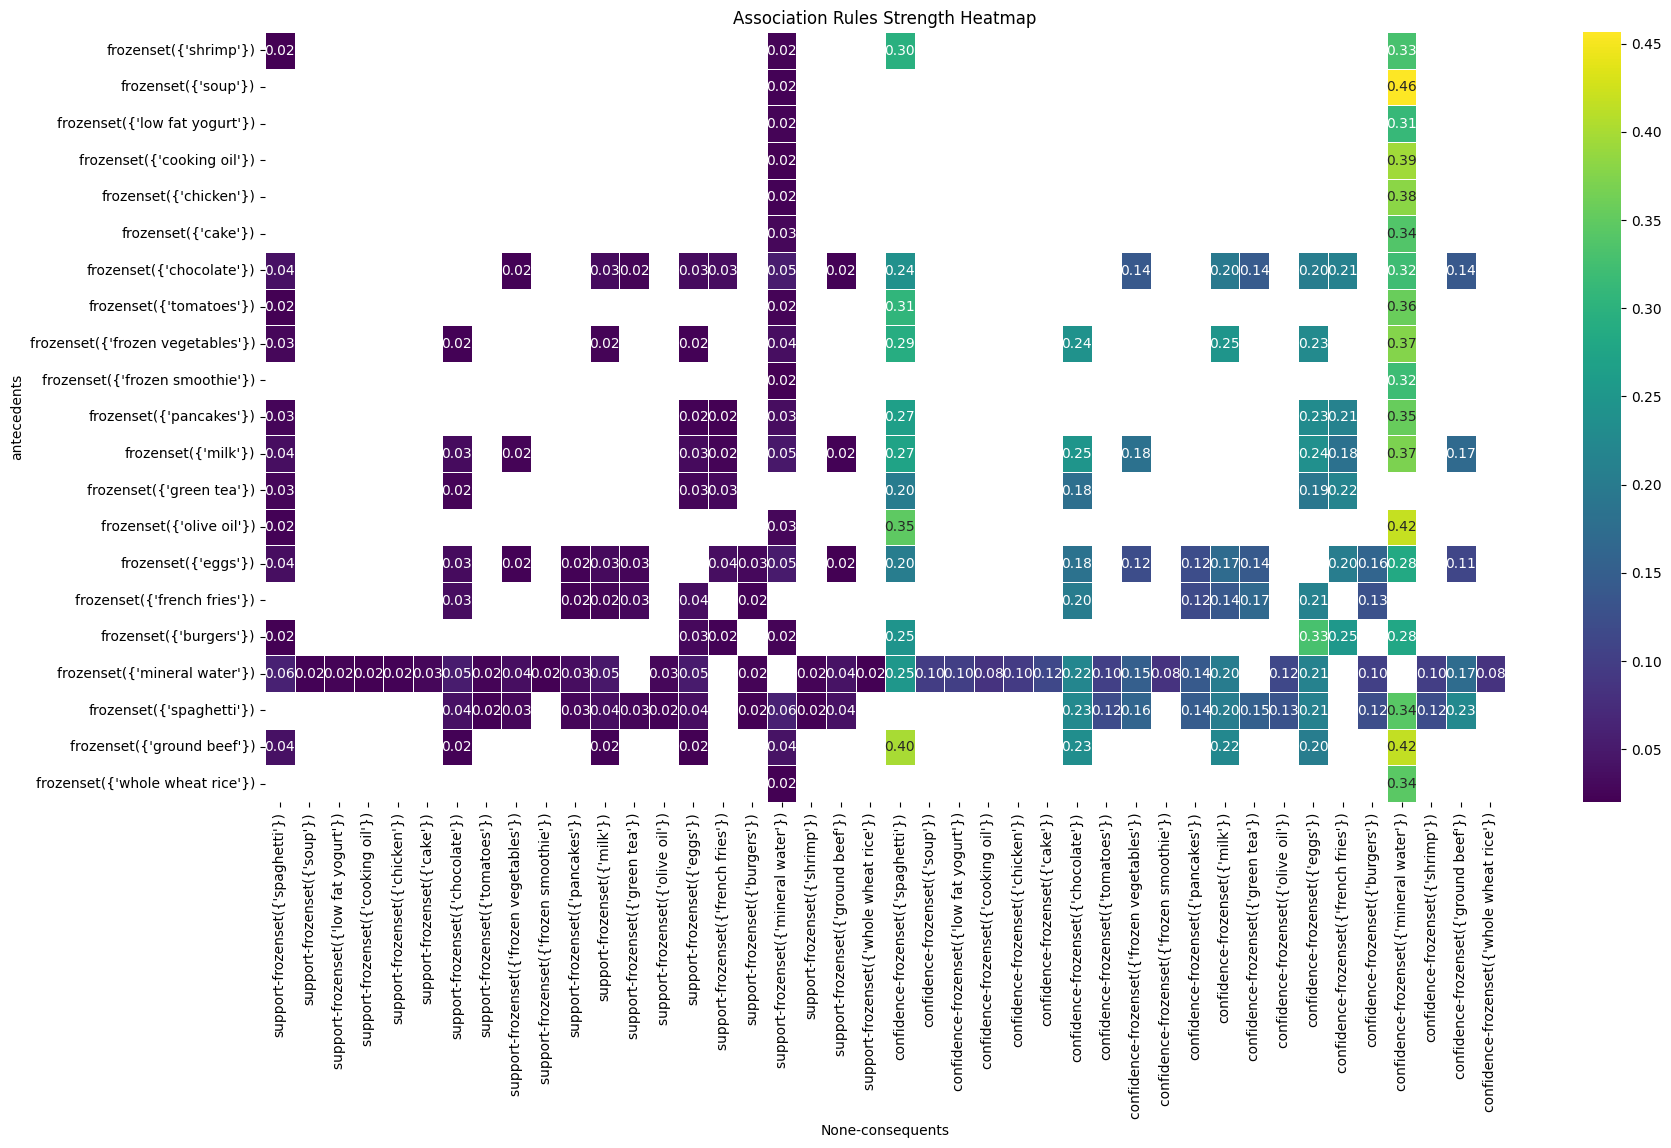

In [115]:
#heat map
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values=['support', 'confidence'])

plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
plt.title('Association Rules Strength Heatmap')
plt.show()